# Exp 4: Image Compression #
## 1.	Aims ##

#### 1. Be familiar with some basic image fidelity assessment methods such as MSE, PSNR and SSIM.

#### 2. Be familiar with the process of JPEG compression.
    
#### 3. Be familiar with Discrete Cosine Transform, Huffman Coding, and Predictive Coding.

## 2.	Steps and Requirements

### (1) Compression Ratio and Relative Coding Redundancy
(a) Load the image bunny.png. Save it as a JPEG image with a quality factor of 90, 60, 10, respectively. Name the images as b90.jpg, b60.jpg, b10.jpg, respectively. 

(b) Display the original image and the compressed images.

(c) Calculate the *Compression Ratio* and *Relative Data Redundancy* between the PNG image and JPEG images according to the file sizes. (Tips: ``os.path.getsize``)

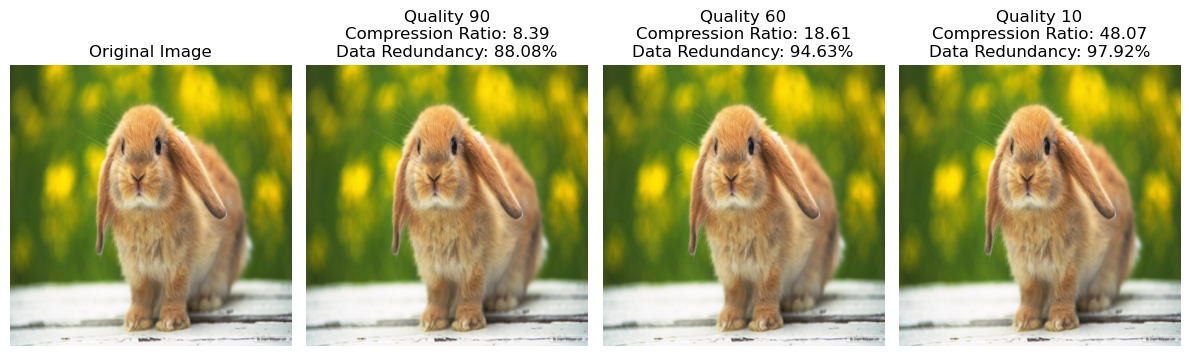

In [62]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display

# Calculate compression ratio and relative data redundancy.
def calculate_metrics(original_size, compressed_size):
    compression_ratio = original_size / compressed_size
    relative_data_redundancy = 1 - (compressed_size / original_size)
    return compression_ratio, relative_data_redundancy

# Save and display each compressed version and get its size
def save_and_display_compression(image_path, quality, output_filename):
    # Load the image
    img = Image.open(image_path)
    # Save the image with specified JPEG quality
    img.save(output_filename, 'JPEG', quality=quality)
    # Calculate and return the file size of the compressed image
    compressed_size = os.path.getsize(output_filename)
    return img, compressed_size

# Prepare the figure for displaying multiple images
def display_images(images, titles):
    plt.figure(figsize=(12, 8))
    for i, (img, title) in enumerate(zip(images, titles), start=1):
        plt.subplot(1, len(images), i)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Load the original PNG image 
original_image_path = r"E:\Homework\DIP\exp4\bunny.png"
original_image = Image.open(original_image_path)

# Get the size of the original image in bytes
original_size = os.path.getsize(original_image_path)

# Quality factors and output filenames for different compressions
qualities = [90, 60, 10]
filenames = ['b90.jpg', 'b60.jpg', 'b10.jpg']
images = [original_image]
titles = ['Original Image']

# Process each quality setting 
for quality, filename in zip(qualities, filenames):
    # Save and display each compressed version and get its size
    img, compressed_size = save_and_display_compression(original_image_path, quality, filename)
    
    # Calculate compression ratio and relative data redundancy.
    compression_ratio, redundancy = calculate_metrics(original_size, compressed_size)
    images.append(img)
    titles.append(f"Quality {quality}\nCompression Ratio: {compression_ratio:.2f}\nData Redundancy: {redundancy:.2%}")

# Display all images with metrics in the same plot
display_images(images, titles)


 ### (2) Fidelity Criteria 
(a) Load the saved JPEG images. Use functions from ``skimage.metrics`` to calculate MSE, PSNR, and SSIM values between the PNG image and JPEG images. 

(b) Implement a SSIM function by yourself according to [1].

[1] Wang Z, Bovik AC, Sheikh HR, Simoncelli EP. Image quality assessment: from error visibility to structural similarity. IEEE Trans Image Process. 2004 Apr;13(4):600-12.

Results for JPEG quality 90:
  MSE: 3.22
  PSNR: 43.05 dB
  SSIM: 0.9879
  Manual SSIM: 1.1148

Results for JPEG quality 60:
  MSE: 9.52
  PSNR: 38.34 dB
  SSIM: 0.9680
  Manual SSIM: 1.2738

Results for JPEG quality 10:
  MSE: 65.01
  PSNR: 30.00 dB
  SSIM: 0.8408
  Manual SSIM: 1.8375



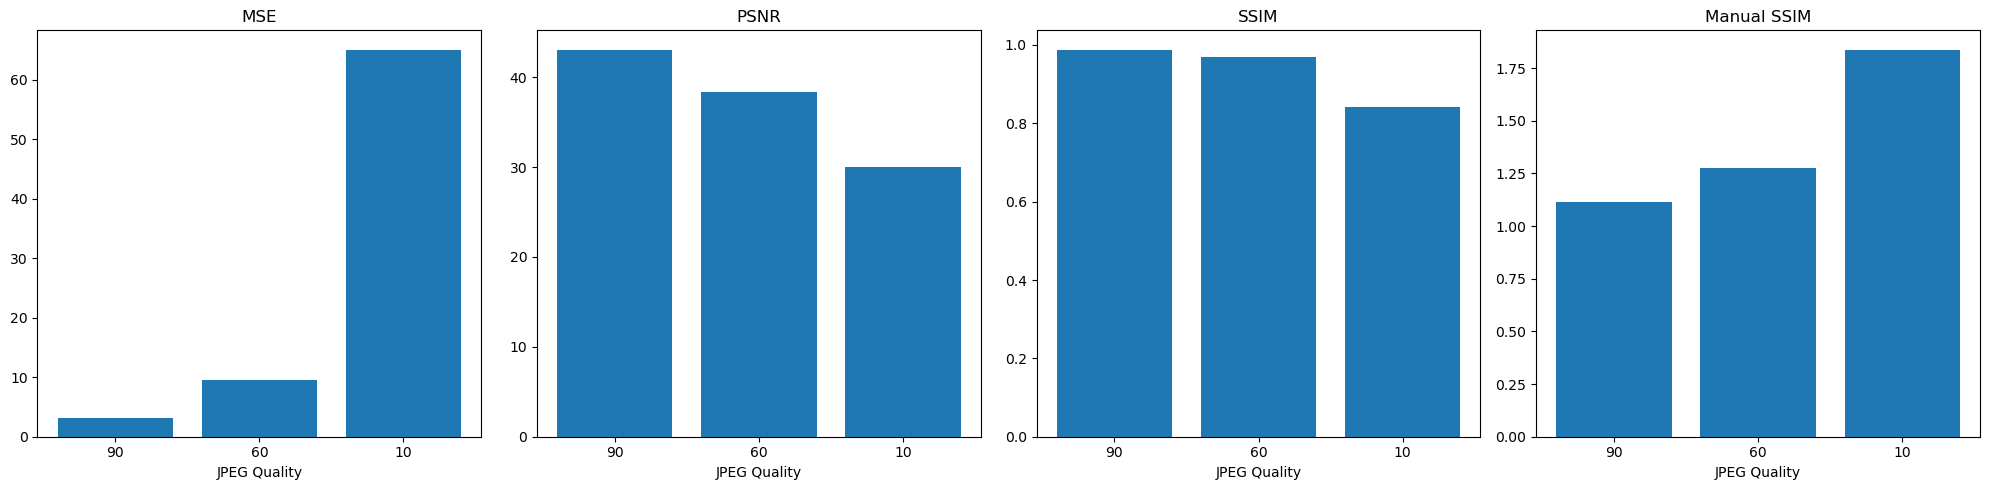

In [11]:
import numpy as np
from skimage import io
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter 

def ssim_manual(img1, img2, C1 = (0.01*255)**2, C2 = (0.03*255)**2):
    # Using Gaussian Filtering to Obtain Local Means
    mu1 = gaussian_filter(img1, sigma = 1.5)
    mu2 = gaussian_filter(img2, sigma = 1.5)
    
    # Calculate the variance and covariance
    sigma1_sq = gaussian_filter(img1 * img1, sigma = 1.5) - mu1**2
    sigma2_sq = gaussian_filter(img2 * img2, sigma = 1.5) - mu2**2
    sigma12 = gaussian_filter(img1 * img2, sigma = 1.5) - mu1 * mu2
    
    # Calculate the SSIM index
    ssim_map = ((2 * mu1 * mu2 + C1) * (2 * sigma12 + C2)) / ((mu1**2 + mu2**2 + C1) * (sigma1_sq + sigma2_sq + C2))
    return ssim_map.mean()

def compute_psnr(X, Y, data_range):
    mse = mean_squared_error(X, Y)
    psnr = 10 * np.log10((data_range ** 2) / mse)
    return psnr

# File paths for the images
image_paths = ["E:\\Homework\\DIP\\exp4\\bunny.png", # Original image
               "E:\\Homework\\DIP\\exp4\\b90.jpg",   # JPEG image with quality factor 90
               "E:\\Homework\\DIP\\exp4\\b60.jpg",   # JPEG image with quality factor 60
               "E:\\Homework\\DIP\\exp4\\b10.jpg"]   # JPEG image with quality factor 10

# Load the original image
original_image = io.imread(image_paths[0])

results = []

# Loop over the JPEG images
for idx, path in enumerate(image_paths[1:], 1):
    jpeg_image = io.imread(path)
    
    # Calculate MSE
    mse = mean_squared_error(original_image, jpeg_image)
    
    # Calculate PSNR
    psnr = peak_signal_noise_ratio(original_image, jpeg_image)
    
    # Calculate SSIM for the first channel (single channel analysis)
    ssim = structural_similarity(original_image[:, :, 0], jpeg_image[:, :, 0], win_size=11)
    
    # Calculate Manual SSIM
    manual_ssim = ssim_manual(original_image, jpeg_image)
    
    # Store results
    results.append((mse, psnr, ssim, manual_ssim))

    # Print results
    print(f"Results for JPEG quality {image_paths[idx][-6:-4]}:")
    print(f"  MSE: {mse:.2f}")
    print(f"  PSNR: {psnr:.2f} dB")
    print(f"  SSIM: {ssim:.4f}")
    print(f"  Manual SSIM: {manual_ssim:.4f}\n")

# Plotting the results
metrics = ['MSE', 'PSNR', 'SSIM', 'Manual SSIM']
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for idx, ax in enumerate(axs):
    ax.bar(range(1, 4), [result[idx] for result in results])
    ax.set_title(metrics[idx])
    ax.set_xlabel('JPEG Quality')
    ax.set_xticks(range(1, 4))
    ax.set_xticklabels(['90', '60', '10'])

plt.tight_layout()
plt.show()



### (3) Simulation of a Part of JPEG Compression
(a) Load the grayscale image lenagray.tiff.

(b) Shift the pixel intensity by -128. 

(c) Divide the image into non-overlapped 8$*$8 subimages and perform 8$*$8 block DCT on each subimage. (Tips: ``cv2.dct`` or ``scipy.fftpack.dct``)

(d) Use a quantization table with QF=50 for quantization. 

(e) Perform lossless predictive coding (difference coding) of DC coefficients by using the coefficient in the previous subimage as reference (a raster scan mannar).  

(f) Sort 63 AC coefficients in each block in a ZigZag order. Converted them into a one-dimensional vector. 

(g) Save all the compressed data into a Numpy data format (refered to as NPY/NPZ (.npy or .npz) file)  (Tips: ``np.save`` or ``np.savez``).

(h) Compress the npy/npz file to a zip file (refered to as NPZzip). Compress the TIFF image to another zip file (refered to as TIFFzip) (Tips: ``zipfile.Zipfile``, ``zipfile.write``, ``zipfile.close``. For more details please refer to https://docs.python.org/3/library/zipfile.html and https://cloud.tencent.com/developer/article/1431438).

(i) Calculate the Compression Ratio between the TIFF image and the NPY/NPZ file according to the file sizes. Calculate the Compression Ratio between the TIFF image and the NPZzip file according to the file sizes. Calculate the Compression Ratio between the TIFFZzip and the NPZzip according to the file sizes.

(j) Load the above saved file. Decode it to a recovered image.

(k) Compute the MSE and PSNR of the recovered image, and display it with the original image side by side.

``quantization_table = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
[12, 12,14, 19, 26, 58, 60, 55],
[14, 13, 16, 24, 40, 57, 69, 56],
[14, 17, 22, 29, 51, 87, 80, 62],
[18, 22, 37, 56, 68, 109, 103, 77],
[24, 35, 55, 64, 81, 104, 113, 92],
[49, 64, 78, 87, 103, 121, 120, 101],
[72, 92, 95, 98, 112, 100, 103, 99]], dtype=np.float32)``

### Change the punny format to jiff doing the experiment

In [40]:
from PIL import Image

# Open PNG files
image = Image.open("E:\\Homework\\DIP\\exp4\\bunny.png")

# Convert to grayscale
gray_image = image.convert("L") 

# Save as TIFF file
gray_image.save("E:\\Homework\\DIP\\exp4\\bunny_gray.tiff", format='TIFF')

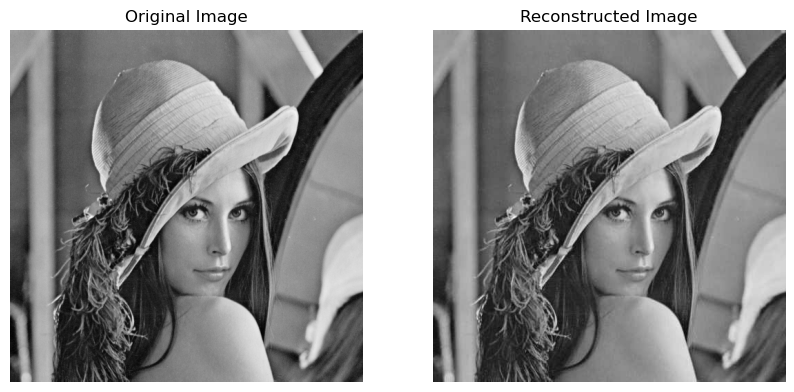

PSNR: 36.171237089887725
MSE: 15.70206069946289
Compression Ratio (TIFF and NPY/NPZ): 0.9993065292934219
Compression Ratio (TIFF NPZzip): 7.944806276695647
Compression Ratio (TIFFzip NPZzip): 1.1787341908691313


In [2]:
import cv2
import numpy as np
import zipfile
import os, io
import math
from typing import List, Tuple
import matplotlib.pyplot as plt

# Load and preprocess the image, convert to grayscale, and shift pixel values by -128
def load_and_preprocess_image(image_path: str) -> np.ndarray:
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Image not found at path: {image_path}")
    return (image.astype(np.int32) - 128).astype(np.int16)

# Divide the image into non-overlapping 8x8 blocks
def divide_into_blocks(image: np.ndarray, block_size: int) -> List[np.ndarray]:
    rows, cols = image.shape
    return [image[r:r+block_size, c:c+block_size] for r in range(0, rows, block_size) for c in range(0, cols, block_size)]

# Perform Discrete Cosine Transform (DCT) on each block
def perform_dct(subimages: List[np.ndarray]) -> List[np.ndarray]:
    return [cv2.dct(np.float32(subimage)) for subimage in subimages]

# Quantize the DCT coefficients using the quantization table
def quantize_dct_images(dct_images: List[np.ndarray], quantization_table: np.ndarray) -> List[np.ndarray]:
    return [np.round(dct_image / quantization_table).astype(np.int8) for dct_image in dct_images]

# Perform zigzag traversal on the input block
def zigzag_sort(block: np.ndarray) -> List[int]:
    rows, cols = block.shape
    zigzag = []
    for i in range(rows + cols - 1):
        if i % 2 == 0:
            zigzag.extend(block[j, i - j] for j in range(min(i, rows - 1), max(0, i - cols + 1) - 1, -1))
        else:
            zigzag.extend(block[j, i - j] for j in range(max(0, i - cols + 1), min(i, rows - 1) + 1))
    return zigzag

# Save quantized images as a NPZ file
def save_to_npz(quantized_images: List[np.ndarray], filename: str) -> None:
    quantized_images_combined = np.stack(quantized_images)
    np.savez(filename, quantized_images_combined=quantized_images_combined)

# Compress the NPZ file into a ZIP file
def compress_to_zip(input_filename: str, output_zip_filename: str) -> None:
    with zipfile.ZipFile(output_zip_filename, "w", compression=zipfile.ZIP_DEFLATED) as z:
        z.write(input_filename)

# Load NPZ file from the ZIP file
def load_from_npz(zip_filename: str, npz_filename: str) -> np.ndarray:
    with zipfile.ZipFile(zip_filename, 'r') as z:
        with z.open(npz_filename) as f:
            npz_file_content = f.read()
        with io.BytesIO(npz_file_content) as bytes_io:
            npz_file = np.load(bytes_io)
            return npz_file["quantized_images_combined"]

# Reverse the quantization process to obtain DCT coefficients
def reverse_quantization(quantized_images_combined: np.ndarray, quantization_table: np.ndarray) -> List[np.ndarray]:
    return [quantized_image.astype(np.float32) * quantization_table for quantized_image in quantized_images_combined]

# Perform Inverse Discrete Cosine Transform (IDCT) on the quantized DCT coefficients
def perform_idct(dct_images: List[np.ndarray]) -> List[np.ndarray]:
    return [cv2.idct(dct_image) for dct_image in dct_images]

# Reconstruct the image from IDCT blocks
def reconstruct_image(idct_images: List[np.ndarray], image_shape: Tuple[int, int], block_size: int) -> np.ndarray:
    rows, cols = image_shape
    reconstructed_image = np.zeros((rows, cols), dtype=np.uint8)
    idx = 0
    for r in range(0, rows, block_size):
        for c in range(0, cols, block_size):
            block = np.clip(idct_images[idx] + 128, 0, 255)
            reconstructed_image[r:r+block_size, c:c+block_size] = block.astype(np.uint8)
            idx += 1
    return reconstructed_image

# Calculate the compression ratios
def calculate_compression_ratios(original_image_path: str, compressed_npz_path: str, compressed_npz_zip_path: str, compressed_tiff_zip_path: str) -> Tuple[float, float, float]:
    original_image_size = os.path.getsize(original_image_path)
    compressed_zip_size = os.path.getsize(compressed_npz_path)
    compressed_npz_zip_size = os.path.getsize(compressed_npz_zip_path)
    compressed_tiff_zip_size = os.path.getsize(compressed_tiff_zip_path)
    compression_ratio_zip = original_image_size / compressed_zip_size
    compression_ratio_npz_zip = original_image_size / compressed_npz_zip_size
    compression_ratio_tiff_zip = original_image_size / compressed_tiff_zip_size
    return compression_ratio_zip, compression_ratio_npz_zip, compression_ratio_tiff_zip

# Calculate Mean Squared Error (MSE) and Peak Signal-to-Noise Ratio (PSNR)
def calculate_mse_psnr(original_image: np.ndarray, reconstructed_image: np.ndarray) -> Tuple[float, float]:
    mse = np.mean((original_image - reconstructed_image) ** 2)
    psnr = 20 * math.log10(255 / math.sqrt(mse))
    return mse, psnr

# Main function to execute the image compression and decompression
def main():
    image_path = r"E:\Homework\DIP\exp4\lenagray.tiff"
    block_size = 8
    quantization_factor = 1
    quantization_table = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                                   [12, 12, 14, 19, 26, 58, 60, 55],
                                   [14, 13, 16, 24, 40, 57, 69, 56],
                                   [14, 17, 22, 29, 51, 87, 80, 62],
                                   [18, 22, 37, 56, 68, 109, 103, 77],
                                   [24, 35, 55, 64, 81, 104, 113, 92],
                                   [49, 64, 78, 87, 103, 121, 120, 101],
                                   [72, 92, 95, 98, 112, 100, 103, 99]], dtype=np.float32) / quantization_factor

    # Step 1: Load and preprocess the image
    shifted_image = load_and_preprocess_image(image_path)
    
    # Step 2: Divide the image into 8x8 blocks
    subimages = divide_into_blocks(shifted_image, block_size)
    
    # Step 3: Perform DCT on each block
    dct_images = perform_dct(subimages)
    
    # Step 4: Quantize the DCT coefficients
    quantized_images = quantize_dct_images(dct_images, quantization_table)
    
    # Step 5: Perform zigzag sorting on the quantized coefficients
    zigzag_vectors = [zigzag_sort(quantized_image) for quantized_image in quantized_images]
    
    # Step 6: Save the quantized images to a NPZ file
    save_to_npz(quantized_images, "compressed_data.npz")
    
    # Step 7: Compress the NPZ file into a ZIP file
    compress_to_zip("compressed_data.npz", "NPZzip.zip")
    
    # Step 8: Compress the original TIFF image into another ZIP file
    compress_to_zip(image_path, "TIFFzip.zip")
    
    # Step 9: Calculate the compression ratios
    compression_ratio_zip, compression_ratio_npz_zip, compression_ratio_tiff_zip = calculate_compression_ratios(
        image_path, "compressed_data.npz", "NPZzip.zip", "TIFFzip.zip")
    
    # Step 10: Load the quantized images from the NPZ file in the ZIP archive
    quantized_images_combined = load_from_npz("NPZzip.zip", "compressed_data.npz")
    
    # Step 11: Reverse the quantization process to get the DCT coefficients
    decoded_dct_images = reverse_quantization(quantized_images_combined, quantization_table)
    
    # Step 12: Perform IDCT on the DCT coefficients to reconstruct the image blocks
    idct_images = perform_idct(decoded_dct_images)
    
    # Step 13: Reconstruct the full image from the IDCT blocks
    reconstructed_image = reconstruct_image(idct_images, shifted_image.shape, block_size)
    
    # Step 14: Calculate the MSE and PSNR between the original and reconstructed images
    mse, psnr = calculate_mse_psnr(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), reconstructed_image)
    
    # Step 15: Display the original and reconstructed images side by side
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Reconstructed Image")
    plt.imshow(reconstructed_image, cmap='gray')
    plt.axis('off')

    plt.show()

    # Print the PSNR, MSE, and compression ratios
    print(f"PSNR: {psnr:}")
    print(f"MSE: {mse:}")
    print(f"Compression Ratio (TIFF and NPY/NPZ): {compression_ratio_zip:}")
    print(f"Compression Ratio (TIFF NPZzip): {compression_ratio_npz_zip:}")
    print(f"Compression Ratio (TIFFzip NPZzip): {compression_ratio_tiff_zip:}")

if __name__ == "__main__":
    main()
    
    


## 3.	Requirements of Experiment Report ##
#### (1) Use the Jupyter Notebook to write and test codes. 
#### (2) Display the results in the Jupyter Notebook.
#### (3) Sumbit the report according to the template including the corresponding codes and results. 
#### (4) The report is required to be tidy with clear procedures.
#### (5) The codes should be concise and give some necessary comments.